In [1]:
!pip install ISLP

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import sklearn
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
unemployment = pd.read_csv('unemployment_rate_raw.csv')
unemployment

,Geography,1976-01-01,1976-02-01,1976-03-01,1976-04-01,1976-05-01,1976-06-01,1976-07-01,1976-08-01,1976-09-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,United States,7.9,7.7,7.6,7.7,7.4,7.6,7.8,7.8,7.6,...,3.5,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8
1,Alabama,6.6,6.6,6.6,6.5,6.4,6.5,6.6,6.7,6.8,...,2.6,2.6,2.5,2.3,2.2,2.2,2.2,2.1,2.1,2.2
2,Alaska,7.1,7.1,7.0,6.9,6.9,7.1,7.3,7.6,8.0,...,3.7,3.8,3.8,3.7,3.7,3.6,3.7,3.8,3.9,4.1
3,Arizona,10.2,10.2,10.1,10.0,9.8,9.7,9.7,9.6,9.6,...,4.0,3.8,3.7,3.5,3.4,3.4,3.5,3.6,3.8,4.0
4,Arkansas,7.3,7.3,7.3,7.2,7.1,6.9,6.8,6.7,6.6,...,3.4,3.4,3.2,3.0,2.8,2.7,2.6,2.6,2.7,2.9
5,California,9.2,9.2,9.1,9.1,9.0,9.0,9.0,9.1,9.2,...,4.1,4.2,4.4,4.4,4.5,4.5,4.6,4.6,4.6,4.7
6,Colorado,5.8,5.7,5.7,5.6,5.6,5.6,5.8,5.9,6.1,...,2.8,2.8,2.9,2.8,2.8,2.8,2.8,2.9,3.1,3.2
7,Connecticut,9.8,9.8,9.8,9.6,9.4,9.3,9.1,9.0,8.8,...,4.0,3.9,4.0,3.9,3.8,3.7,3.7,3.6,3.5,3.5
8,Delaware,8.0,8.0,8.0,8.1,8.3,8.6,8.8,8.9,9.0,...,4.6,4.6,4.6,4.4,4.3,4.2,4.2,4.1,4.1,4.1
9,District of Columbia,8.7,8.7,8.6,8.5,8.4,8.3,8.4,8.5,8.7,...,4.2,4.5,4.7,4.8,5.0,5.1,5.1,5.0,5.0,5.0


In [3]:
school_unemployment = pd.read_csv('state_and_local_public_education_employment_raw_in_thousands.csv')
school_unemployment

,Geography,2012-01-01,2012-02-01,2012-03-01,2012-04-01,2012-05-01,2012-06-01,2012-07-01,2012-08-01,2012-09-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,United States,10186.6,10650.2,10697.6,10662.3,10541.4,9867.7,8610.6,8876.0,10053.8,...,10626.2,10405.4,10787.5,10817.6,10826.6,10720.3,10121.8,9039.0,9474.7,10620.4
1,Alabama,162.0,166.7,168.2,165.5,163.1,157.6,143.8,147.7,158.3,...,172.7,168.5,171.1,171.8,171.6,171.5,169.2,160.7,165.0,171.8
2,Alaska,30.4,33.8,33.9,33.8,31.5,29.3,23.8,25.9,31.9,...,28.3,26.9,29.2,29.3,29.1,28.3,22.9,19.3,21.4,27.2
3,Arizona,190.5,202.0,201.9,202.1,191.9,152.2,134.9,175.5,200.1,...,189.0,191.8,198.0,197.0,199.4,193.5,152.7,151.0,185.5,201.7
4,Arkansas,104.8,108.3,108.8,108.7,108.7,99.9,88.0,92.5,104.6,...,102.2,99.6,101.8,102.1,102.6,101.6,93.4,82.2,87.0,100.6
5,California,1132.3,1158.7,1177.1,1171.8,1174.5,1154.0,977.9,990.4,1062.1,...,1190.7,1211.5,1226.7,1244.2,1248.8,1255.9,1234.6,1065.7,1111.0,1187.5
6,Colorado,184.5,196.4,198.1,196.7,196.8,179.7,159.7,166.1,190.4,...,222.9,212.5,223.3,225.6,224.8,225.6,211.2,197.5,206.3,224.4
7,Connecticut,122.1,130.1,130.3,129.2,126.1,115.4,98.5,99.8,124.0,...,125.2,123.6,125.6,126.3,124.8,123.0,114.2,96.7,97.8,124.5
8,Delaware,30.9,32.9,33.9,33.5,33.8,30.3,28.3,27.5,31.7,...,38.2,36.0,38.0,38.3,38.2,37.6,35.2,33.8,33.2,36.7
9,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
federal_employment = pd.read_csv('federal_public_employment_raw_in_thousands.csv')
federal_employment

,Geography,1990-01-01,1990-02-01,1990-03-01,1990-04-01,1990-05-01,1990-06-01,1990-07-01,1990-08-01,1990-09-01,...,2022-12-01,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01
0,United States,3103.0,3109.0,3194.0,3259.0,3435.0,3332.0,3274.0,3174.0,3136.0,...,2874.0,2886.0,2895.0,2906.0,2910.0,2919.0,2925.0,2935.0,2946.0,2952.0
1,Alabama,66.0,65.7,66.4,66.3,68.7,67.3,67.3,64.7,64.2,...,55.4,55.7,56.1,56.5,56.7,56.9,57.2,57.4,57.6,57.7
2,Alaska,18.7,18.9,19.1,19.1,18.9,18.8,19.0,18.5,18.4,...,15.2,15.2,15.2,15.3,15.5,15.4,15.4,15.4,15.6,15.6
3,Arizona,45.4,45.2,46.2,47.3,49.5,47.6,47.7,45.8,44.7,...,57.8,58.0,58.2,58.5,58.7,58.6,58.7,59.0,59.3,59.6
4,Arkansas,22.2,22.2,23.5,22.9,24.9,23.2,23.6,22.2,22.3,...,20.5,20.6,20.9,21.0,21.1,21.0,21.1,21.3,21.3,21.5
5,California,358.6,358.1,360.5,368.8,385.0,381.4,373.1,361.0,351.5,...,246.1,246.7,247.8,248.6,248.2,248.2,248.1,248.6,249.8,250.0
6,Colorado,56.4,56.7,57.4,58.7,60.2,57.9,58.2,56.9,56.5,...,53.5,53.6,54.0,54.1,54.2,54.3,54.3,54.4,54.9,55.1
7,Connecticut,25.4,25.3,25.6,26.2,29.6,28.2,27.2,25.6,25.9,...,18.4,18.4,18.5,18.7,18.9,18.8,18.8,18.8,18.9,18.9
8,Delaware,5.9,5.9,5.9,6.3,6.5,6.5,6.5,5.9,5.9,...,6.0,6.0,6.2,6.2,6.3,6.3,6.3,6.3,6.4,6.5
9,District of Columbia,221.0,221.1,221.1,220.2,220.3,220.7,220.1,219.0,219.1,...,192.6,192.4,192.6,192.3,192.2,192.5,191.7,191.4,191.8,192.2


In [5]:
unemployment.drop(unemployment.iloc[:,1:505], axis = 1, inplace = True)

In [6]:
school_unemployment.drop(school_unemployment.iloc[:, 1:73], axis = 1, inplace = True)

In [7]:
federal_employment.drop(federal_employment.iloc[:,1:337], axis = 1, inplace = True)

In [10]:
us_data = unemployment.iloc[0]
us_school_data = school_unemployment.iloc[0]
us_federal_data = federal_employment.iloc[0]

In [11]:
us_num = us_data.drop(['Geography'])
us_school_num = us_school_data.drop(['Geography'])
us_federal_num = us_federal_data.drop(['Geography'])

Text(0.5, 0, 'Date')

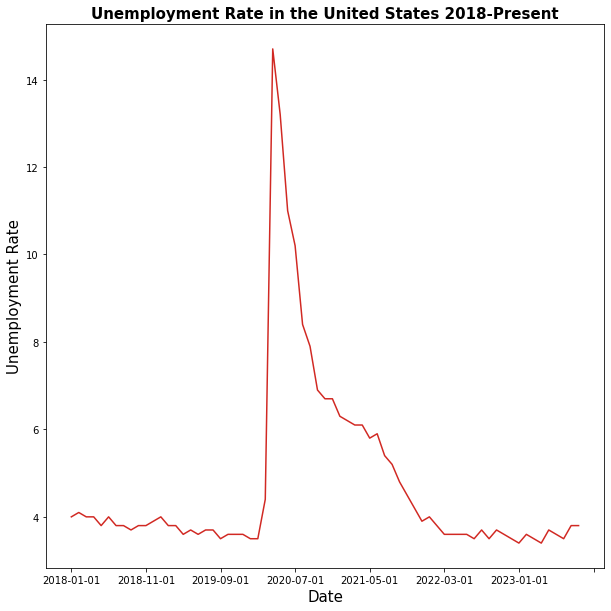

In [12]:
us_num.plot(y = 'Unemployment Rate', figsize = (10,10), color="#d12923")
plt.title("Unemployment Rate in the United States 2018-Present", fontweight="bold", fontsize=15)
plt.ylabel("Unemployment Rate", fontsize=15)
plt.xlabel("Date", fontsize=15)

Text(0, 0.5, 'Employment')

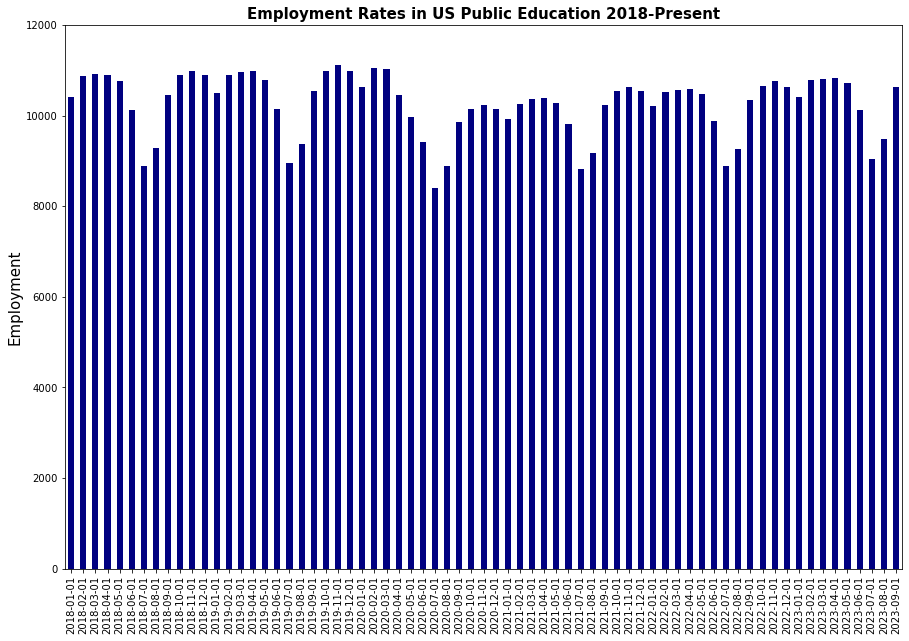

In [14]:
us_school_num.plot(kind="bar", y="Employment Rate", figsize=(15,10), ylim=(0,12000), color="navy")
plt.title("Employment Rates in US Public Education 2018-Present", fontweight="bold", fontsize=15)
plt.ylabel("Employment", fontsize=15)

Text(0.5, 0, 'Date')

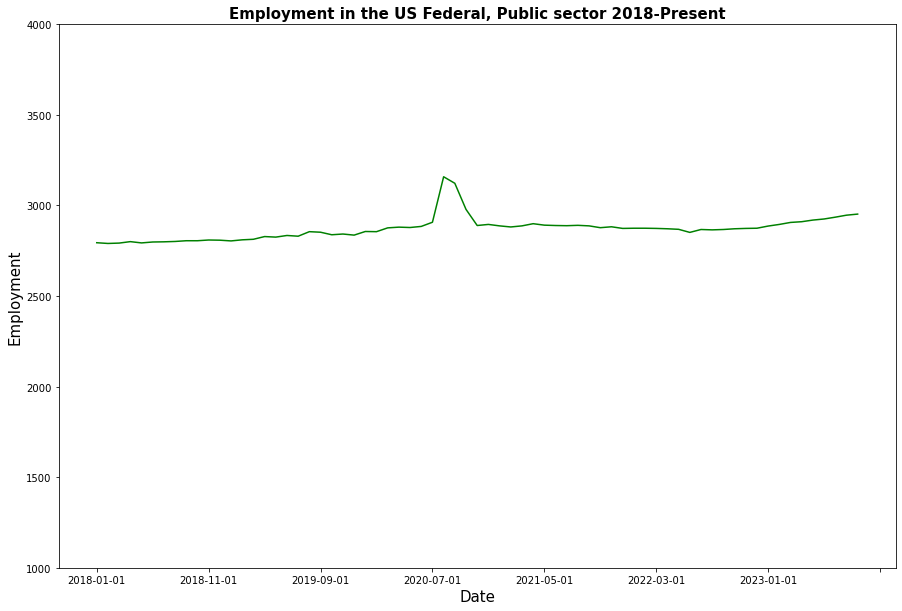

In [21]:
us_federal_num.plot(figsize=(15,10), ylim=(1000,4000), color="green")
plt.title("Employment in the US Federal, Public sector 2018-Present", fontweight="bold", fontsize=15)
plt.ylabel("Employment", fontsize=15)
plt.xlabel("Date", fontsize=15)

Time is a confounding variable, so we need to look at covid cases

In [10]:
covid_cases_per_month = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,67,70650,981693,649602,665126,2036225,1392558,1407326,1642498,4004107,6951428,5816701,2691162,2062844,1748566,940370,471205,1026941,4735513,3860837,2356491,2934701,4945085,19404421,5953075,852818,1035540,3067533,2863395,
                         3392746,3466617,1704482,1071919,1373147,1942035,1534263,1109550,693674,453351,282818,191566,269789,622159,581018]
    
unemp_rate = [4, 4.1,4,4,3.8,4,3.8,3.8,3.7,3.8,3.8,3.9,4,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,3.5,3.5,4.4,14.7,13.2,11,10.2,8.4,7.9,6.9,6.7,6.7,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,4,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8]

gdp = [2968306.26, 2968306.26, 2968306.26, 2978871.497, 2978871.497, 2978871.497, 2981906.814, 2981906.814, 2981906.814, 2978462.897, 2978462.897, 2978462.897, 2959900.768, 2959900.768, 2959900.768, 2985204.802, 2985204.802, 2985204.802, 2997462.812, 2997462.812, 2997462.812, 3035608.571, 3035608.571, 3035608.571, 
       3048187.624, 3048187.624, 3048187.624, 2932378.617, 2932378.617, 2932378.617, 2976449.081, 2976449.081, 2976449.081, 2978929.868, 2978929.868, 2978929.868, 2970991.348, 2970991.348, 2970991.348, 2988911.391, 2988911.391, 2988911.391, 3021044.888, 3021044.888, 3021044.888, 3019498.044, 3019498.044, 3019498.044,
       3033069.412, 3033069.412, 3033069.412, 3031259.896, 3031259.896, 3031259.896, 3036163.1, 3036163.1, 3036163.1, 3051660.727, 3051660.727, 3051660.727, 3071974, 3071974, 3071974, 3145701.376, 3145701.376, 3145701.376, 3145701.376, 3145701.376, 3145701.376]

earnings = [1134.016333, 1138.007524, 1136.710507, 1161.11584, 1132.071597, 1132.187745, 1155.146141, 1140.35711, 1164.711158, 1143.426672, 1148.954534, 1183.925415, 1155.835051, 1153.879988, 1154.139129, 1150.950774, 1145.200743, 1170.038717, 1146.361703, 1156.413173, 1180.573685, 1156.448283, 1156.554192, 
            1184.927883, 1155.149819, 1179.216502, 1182.444454, 1232.997531, 1231.112784, 1202.528186, 1197.52148, 1226.570865, 1201.486313, 1212.252818, 1235.48964, 1227.060402, 1223.804326, 1209.394253, 1210.858057, 1215.682069, 1228.320447, 1193.722325, 1192.810196, 1216.712024, 1196.159321, 1200.135511,
            1196.183299, 1203.26089, 1207.101979, 1186.824733, 1174.506483, 1173.394395, 1180.691813, 1147.211562, 1153.715292, 1155.911784, 1162.017337, 1184.082704, 1162.607502, 1168.127062, 1187.863688, 1164.010035, 1156.090138, 1181.631844, 1154.647723, 1156.621004, 1182.309042, 1159.404129, 1160.03]

housing = [6.807692308, 6.807692308, 6.807692308, 6.217442447, 6.217442447, 6.217442447, 5.978733088, 5.978733088, 5.978733088, 5.597227884, 5.597227884, 5.597227884, 4.889369023, 4.889369023, 4.889369023, 4.884511944, 4.884511944, 4.884511944, 4.911376591, 4.911376591, 4.911376591, 5.489711616, 5.489711616, 5.489711616,
           6.255960328, 6.255960328, 6.255960328, 5.656321882, 5.656321882, 5.656321882, 8.209288479, 8.209288479, 8.209288479, 11.21317475, 11.21317475, 11.21317475, 13.04972177, 13.04972177, 13.04972177, 17.41318391, 17.41318391, 17.41318391, 18.42286265, 18.42286265, 18.42286265, 17.76958768, 17.76958768, 17.76958768,
           18.71070181, 18.71070181, 18.71070181, 17.33844003, 17.33844003, 17.33844003, 12.24335705, 12.24335705, 12.24335705, 8.42158205, 8.42158205, 8.42158205, 4.614520357, 4.614520357, 4.614520357, 3.015387804, 3.015387804, 3.015387804, 5.15, 5.15, 5.15]

new_data = {'Covid Cases': covid_cases_per_month,
           'Unemployment Rate': unemp_rate,
           'GDP': gdp,
           'Earnings': earnings,
           'Housing': housing}


new_dataframe = pd.DataFrame(new_data)

#unemp_rate_col = new_dataframe.iloc[:,1] 

#X_train, X_test, Y_train, Y_test = train_test_split(new_dataframe, covid_cases_per_month, test_size = 0.2)

#X = sm.add_constant(X_train)
#glm_model = sm.GLM(Y_train, X, family = sm.families.Binomial()) 
#results = glm_model.fit()
#summarize(results)

In [11]:
y = unemp_rate
X = new_dataframe[['Covid Cases']]

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.219
Model:                            OLS   Adj. R-squared (uncentered):              0.208
Method:                 Least Squares   F-statistic:                              19.08
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    4.38e-05
Time:                        17:33:39   Log-Likelihood:                         -203.82
No. Observations:                  69   AIC:                                      409.6
Df Residuals:                      68   BIC:                                      411.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Covid Cases   7.87e-07    1.8e-07      4.368      0.000    4.27e-07    1.15e-06
==============================================================================
Omnibus:                       28.850   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.721
Skew:                          -0.582   Prob(JB):                     1.00e-64
Kurtosis:                      13.058   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y = gdp
X = new_dataframe[['Covid Cases']]

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.239
Model:                            OLS   Adj. R-squared (uncentered):              0.228
Method:                 Least Squares   F-statistic:                              21.32
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    1.78e-05
Time:                        17:39:12   Log-Likelihood:                         -1117.9
No. Observations:                  69   AIC:                                      2238.
Df Residuals:                      68   BIC:                                      2240.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Covid Cases     0.4716      0.102      4.618      0.000       0.268       0.675
==============================================================================
Omnibus:                       98.137   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1891.482
Skew:                          -4.315   Prob(JB):                         0.00
Kurtosis:                      27.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y = earnings
X = new_dataframe[['Covid Cases']]

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.247
Model:                            OLS   Adj. R-squared (uncentered):              0.236
Method:                 Least Squares   F-statistic:                              22.33
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    1.19e-05
Time:                        17:42:18   Log-Likelihood:                         -576.01
No. Observations:                  69   AIC:                                      1154.
Df Residuals:                      68   BIC:                                      1156.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Covid Cases     0.0002   3.97e-05      4.726      0.000       0.000       0.000
==============================================================================
Omnibus:                      101.361   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2152.262
Skew:                          -4.497   Prob(JB):                         0.00
Kurtosis:                      28.841   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y = housing
X = new_dataframe[['Covid Cases']]

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              55.03
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                    2.49e-10
Time:                        17:46:37   Log-Likelihood:                         -240.23
No. Observations:                  69   AIC:                                      482.5
Df Residuals:                      68   BIC:                                      484.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Covid Cases  2.266e-06   3.05e-07      7.418      0.000    1.66e-06    2.88e-06
==============================================================================
Omnibus:                       63.763   Durbin-Watson:                   0.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.126
Skew:                          -2.379   Prob(JB):                    1.87e-151
Kurtosis:                      17.792   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""